In [ ]:
# Use LangChain’s Ollama chat model
from langchain_ollama import ChatOllama

# Initialize the Ollama chat model
chat = ChatOllama(
    # model="qwen2.5:14b",
    model="qwq",
    verbose=True,
)

# Define a tool
def multiply(a: int, b: int) -> int:
    return a * b

# Augment the LLM with tools
llm_with_tools = chat.bind_tools([multiply])

# Invoke the LLM with input that triggers the tool call
msg = llm_with_tools.invoke("What is 2 times 3?")

# Get the tool call
msg.tool_calls

In [1]:
# from typing import TypedDict, Annotated
# from langgraph.graph.message import add_messages
# from langchain_core.messages import AnyMessage, HumanMessage, AIMessage
# from langgraph.prebuilt import ToolNode
# from langgraph.graph import START, StateGraph
# from langgraph.prebuilt import tools_condition
# from langchain_huggingface import HuggingFaceEndpoint, ChatHuggingFace

# # Generate the chat interface, including the tools
# llm = HuggingFaceEndpoint(
#     repo_id="Qwen/Qwen2.5-Coder-32B-Instruct",
#     huggingfacehub_api_token=HUGGINGFACEHUB_API_TOKEN,
# )

# chat = ChatHuggingFace(llm=llm, verbose=True)
# tools = [guest_info_tool]
# chat_with_tools = chat.bind_tools(tools)

# # Generate the AgentState and Agent graph
# class AgentState(TypedDict):
#     messages: Annotated[list[AnyMessage], add_messages]

# def assistant(state: AgentState):
#     return {
#         "messages": [chat_with_tools.invoke(state["messages"])],
#     }

# ## The graph
# builder = StateGraph(AgentState)

# # Define nodes: these do the work
# builder.add_node("assistant", assistant)
# builder.add_node("tools", ToolNode(tools))

# # Define edges: these determine how the control flow moves
# builder.add_edge(START, "assistant")
# builder.add_conditional_edges(
#     "assistant",
#     # If the latest message requires a tool, route to tools
#     # Otherwise, provide a direct response
#     tools_condition,
# )
# builder.add_edge("tools", "assistant")
# alfred = builder.compile()

# messages = [HumanMessage(content="Tell me about our guest named 'Lady Ada Lovelace'.")]
# response = alfred.invoke({"messages": messages})

# print("🎩 Alfred's Response:")
# print(messages['messages'][-1].content)

In [1]:
import datasets
from langchain.docstore.document import Document

# Load the dataset
guest_dataset = datasets.load_dataset("agents-course/unit3-invitees", split="train")

# Convert dataset entries into Document objects
docs = [
    Document(
        page_content="\n".join([
            f"Name: {guest['name']}",
            f"Relation: {guest['relation']}",
            f"Description: {guest['description']}",
            f"Email: {guest['email']}"
        ]),
        metadata={"name": guest["name"]}
    )
    for guest in guest_dataset
]

In [2]:
from langchain_community.retrievers import BM25Retriever
from langchain.tools import Tool

bm25_retriever = BM25Retriever.from_documents(docs)

def extract_text(query: str) -> str:
    """Retrieves detailed information about gala guests based on their name or relation."""
    results = bm25_retriever.invoke(query)
    if results:
        return "\n\n".join([doc.text for doc in results[:3]])
    else:
        return "No matching guest information found."

guest_info_tool = Tool(
    name="guest_info_retriever",
    func=extract_text,
    description="Retrieves detailed information about gala guests based on their name or relation."
)

In [ ]:
from typing import TypedDict, Annotated
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage, HumanMessage, AIMessage
from langgraph.prebuilt import ToolNode
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition

# Use LangChain’s Ollama chat model
from langchain_ollama import ChatOllama

# Initialize the Ollama chat model
chat = ChatOllama(
    # model="qwen2.5:14b",
    model="qwq",
    verbose=True,
)

tools = [guest_info_tool]
chat_with_tools = chat.bind_tools(tools)

# Generate the AgentState and Agent graph
class AgentState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

def assistant(state: AgentState):
    return {
        "messages": [chat_with_tools.invoke(state["messages"])],
    }

## The graph
builder = StateGraph(AgentState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message requires a tool, route to tools
    # Otherwise, provide a direct response
    tools_condition,
)
builder.add_edge("tools", "assistant")
alfred = builder.compile()

messages = [HumanMessage(content="Tell me about our guest named 'Lady Ada Lovelace'.")]
response = alfred.invoke({"messages": messages})

print(f'response = {response}')
print(f'messages = {messages}')



# print("🎩 Alfred's Response:")
# print(messages['messages'][-1].content)

response = {'messages': [HumanMessage(content="Tell me about our guest named 'Lady Ada Lovelace'.", additional_kwargs={}, response_metadata={}, id='2d880bc6-a0f7-46fe-a503-75e9889a60f7'), AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'qwq', 'created_at': '2025-04-06T08:22:51.9077329Z', 'done': True, 'done_reason': 'stop', 'total_duration': 144581018200, 'load_duration': 16218345700, 'prompt_eval_count': 165, 'prompt_eval_duration': 36265545200, 'eval_count': 157, 'eval_duration': 92064619500, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-b3aaa989-37e7-45f9-94dd-d46cf654c18d-0', tool_calls=[{'name': 'guest_info_retriever', 'args': {'__arg1': 'Lady Ada Lovelace'}, 'id': '8a674efc-864f-47e5-92d8-69963497b7c9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 165, 'output_tokens': 157, 'total_tokens': 322}), ToolMessage(content='Error: AttributeError("\'Document\' object has no attribute \'text\'")\n Please fix your

: 

In [ ]:
# # qwen2.5 14b reply: 🎩 Alfred's Response:
# It seems there is an issue with the tool's response format or the way information is being retrieved. I'm receiving an error because the tool might be expecting a different type of input or there could be an internal problem.

# However, without fixing the technical aspect right away, let me attempt to provide you with what we generally know about Lady Ada Lovelace:

# Lady Ada Lovelace (born Augusta Ada King, Countess of Lovelace) is widely recognized as one of the world's first computer programmers. She worked closely with Charles Babbage on his Analytical Engine and wrote notes that included what is now considered to be the first algorithm intended to be processed by a machine. This makes her a pioneer in the field of computer science.

# Would you like more specific information about Lady Ada Lovelace or help with another query?

In [ ]:
# qwq

# 🎩 Alfred's Response:
# <think>
# Okay, let me try to figure out what went wrong here. The user asked about Lady Ada Lovelace, and I tried to use the guest_info_retriever function. But there was an error: AttributeError("'Document' object has no attribute 'text'"). Hmm, that error usually means that somewhere in the code, there's an attempt to access the 'text' attribute of a 'Document' object, which doesn't exist.

# Wait, maybe the function I called isn't correctly implemented yet? The user provided the function definition, but maybe the actual backend for guest_info_retriever isn't set up properly. The error might be on their side, but as the assistant, I need to handle it gracefully.

# Alternatively, perhaps the function expects a different parameter format. Let me check the function signature again. The function requires "__arg1" which is a string. I used "Lady Ada Lovelace" as the argument, which is a string. So the parameter seems correct.

# Maybe the error is in how the function is being called or processed. Since the error mentions 'Document' object, maybe the system is trying to process the input as a Document object but can't find the text. Perhaps there's a middleware or a step before the function is called that's mishandling the input.

# Alternatively, maybe the function is supposed to return a Document object, and there's an attempt to access its 'text' attribute which isn't there. But that's part of the function's implementation, which I can't control. 

# Since the user is getting this error, I should inform them that there was a technical issue with retrieving the information. I should apologize and suggest that they try again or check if the guest's name is correctly spelled. Maybe offer to help with another query in the meantime. 

# I need to make sure my response is helpful and not technical jargon. Let me phrase it in a friendly way to maintain user trust.
# </think>

# I encountered an error while trying to retrieve information about Lady Ada Lovelace. It looks like there's a technical issue with accessing guest details at the moment. Would you like me to try again, or is there another way I can assist you in the meantime?

In [ ]:
from typing import TypedDict, Annotated
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage, HumanMessage, AIMessage
from langgraph.prebuilt import ToolNode
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langchain_huggingface import HuggingFaceEndpoint, ChatHuggingFace

from tools import DuckDuckGoSearchRun, weather_info_tool, hub_stats_tool
from retriever import guest_info_tool

combine to single agent

In [ ]:
# Initialize the web search tool
search_tool = DuckDuckGoSearchRun()

# Generate the chat interface, including the tools
llm = HuggingFaceEndpoint(
    repo_id="Qwen/Qwen2.5-Coder-32B-Instruct",
    huggingfacehub_api_token=HUGGINGFACEHUB_API_TOKEN,
)

chat = ChatHuggingFace(llm=llm, verbose=True)
tools = [guest_info_tool, search_tool, weather_info_tool, hub_stats_tool]
chat_with_tools = chat.bind_tools(tools)

# Generate the AgentState and Agent graph
class AgentState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

def assistant(state: AgentState):
    return {
        "messages": [chat_with_tools.invoke(state["messages"])],
    }

## The graph
builder = StateGraph(AgentState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message requires a tool, route to tools
    # Otherwise, provide a direct response
    tools_condition,
)
builder.add_edge("tools", "assistant")
alfred = builder.compile()

In [ ]:
response = alfred.invoke({"messages": "Tell me about 'Lady Ada Lovelace'"})

print("🎩 Alfred's Response:")
print(response['messages'][-1].content)

In [ ]:
response = alfred.invoke({"messages": "Tell me about 'Lady Ada Lovelace'"})

print("🎩 Alfred's Response:")
print(response['messages'][-1].content)

In [ ]:
response = alfred.invoke({"messages": "One of our guests is from Qwen. What can you tell me about their most popular model?"})

print("🎩 Alfred's Response:")
print(response['messages'][-1].content)

In [ ]:
response = alfred.invoke({"messages":"I need to speak with 'Dr. Nikola Tesla' about recent advancements in wireless energy. Can you help me prepare for this conversation?"})

print("🎩 Alfred's Response:")
print(response['messages'][-1].content)

In [ ]:
# First interaction
response = alfred.invoke({"messages": [HumanMessage(content="Tell me about 'Lady Ada Lovelace'. What's her background and how is she related to me?")]})


print("🎩 Alfred's Response:")
print(response['messages'][-1].content)
print()

# Second interaction (referencing the first)
response = alfred.invoke({"messages": response["messages"] + [HumanMessage(content="What projects is she currently working on?")]})

print("🎩 Alfred's Response:")
print(response['messages'][-1].content)

Lang Graph tutorial prompt chaining

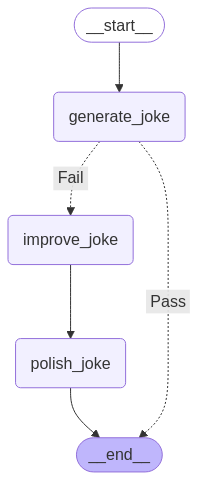

Initial joke:
<think>

Okay, the user wants a short joke about cats. Let me think... I need something that's quick and punny, maybe a play on words. Cats are known for their curiosity and love for boxes, even ones that are too small. How about using "purr" as a pun? Like "purr-cussionist"? That could work.

Wait, maybe set it up with a scenario. A cat walks into a bar... that's a classic setup. But instead of a bar, maybe a jazz club? Cats and jazz might be a fun combo. Let me try: "Why did the cat sit on the piano? To keep his paw-ography straight!" Hmm, paw-ography vs. portfolio? Not sure if that's clear enough.

Alternatively, using "cat-scratch" something. Or maybe something with "meow-sic"? Let me try another angle. "What do you call a cat that's a musician?" Then the punchline could be "A purr-cussionist!" That's better. But maybe add a setup. Like, "Why did the cat join the band? Because he was a great purr-cussionist!" Wait, but the user might want a more classic joke structure

In [5]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display


from langchain_ollama import ChatOllama

# Initialize the Ollama chat model
llm = ChatOllama(
    # model="qwen2.5:14b",
    model="qwq",
    verbose=True,
)


# Graph state
class State(TypedDict):
    topic: str
    joke: str
    improved_joke: str
    final_joke: str


# Nodes
def generate_joke(state: State):
    """First LLM call to generate initial joke"""

    msg = llm.invoke(f"Write a short joke about {state['topic']}")
    return {"joke": msg.content}


def check_punchline(state: State):
    """Gate function to check if the joke has a punchline"""

    # Simple check - does the joke contain "?" or "!"
    if "?" in state["joke"] or "!" in state["joke"]:
        return "Fail"
    return "Pass"


def improve_joke(state: State):
    """Second LLM call to improve the joke"""

    msg = llm.invoke(f"Make this joke funnier by adding wordplay: {state['joke']}")
    return {"improved_joke": msg.content}


def polish_joke(state: State):
    """Third LLM call for final polish"""

    msg = llm.invoke(f"Add a surprising twist to this joke: {state['improved_joke']}")
    return {"final_joke": msg.content}


# Build workflow
workflow = StateGraph(State)

# Add nodes
workflow.add_node("generate_joke", generate_joke)
workflow.add_node("improve_joke", improve_joke)
workflow.add_node("polish_joke", polish_joke)

# Add edges to connect nodes
workflow.add_edge(START, "generate_joke")
workflow.add_conditional_edges(
    "generate_joke", check_punchline, {"Fail": "improve_joke", "Pass": END}
)
workflow.add_edge("improve_joke", "polish_joke")
workflow.add_edge("polish_joke", END)

# Compile
chain = workflow.compile()

# Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))

# Invoke
state = chain.invoke({"topic": "cats"})
print("Initial joke:")
print(state["joke"])
print("\n--- --- ---\n")
if "improved_joke" in state:
    print("Improved joke:")
    print(state["improved_joke"])
    print("\n--- --- ---\n")

    print("Final joke:")
    print(state["final_joke"])
else:
    print("Joke failed quality gate - no punchline detected!")